# Threshold Adjustment

👇 Load the player `player_performances.csv` dataset to see what you will be working with.

In [26]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt


In [1]:
data = pd.read_csv('data/player_performances.csv')

data.head()

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers,target_5y
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


ℹ️ Each observation represents a player and each column a characteristic of performance. The target `target_5y` defines whether the player has had a professional career of less than 5 years [0] or 5 years or more [1].

# Preprocessing

👇 To avoid spending too much time on the preprocessing, Robust Scale the entire feature set. This practice is not optimal, but can be used for preliminary preprocessing and/or to get models up and running quickly.

Save the scaled feature set as `X_scaled`.

In [4]:
X = data.drop("target_5y", axis=1)
y = data["target_5y"]

In [6]:

# Initialize the scaler
robust_scaler = RobustScaler().set_output(transform="pandas")

# Fit the scaler on the data
robust_scaler.fit(X)

# Transform the data
X_scaled = robust_scaler.transform(X)

X_scaled.head(1)

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers
0,-0.9,0.933884,0.352941,0.25,0.666667,-1.206557,1.0,1.5,0.083077,0.585366,0.571429,-0.109375,-0.1,1.0625,0.659794,0.571429,-0.2,0.5,0.375


### ☑️ Check your code

In [7]:
from nbresult import ChallengeResult

result = ChallengeResult('scaled_features',
                         scaled_features = X_scaled
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/03-Performance-metrics/data-threshold-adjustments/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_scaled_features.py::TestScaled_features::test_scaled_features PASSED [100%]

============================== 1 passed in 0.65s ===============================


💯 You can commit your code:

git add tests/scaled_features.pickle

git commit -m 'Completed scaled_features step'

git push origin master



# Base modeling

🎯 The task is to detect players who will last 5 years minimum as professionals, with a 90% guarantee.

👇 Is a default Logistic Regression model going to satisfy the coach's requirements? Use cross-validation and save the score that supports your answer under variable name `base_score`.

In [9]:
logistic_regression = LogisticRegression()

In [16]:
base_cv = cross_validate(
    estimator=logistic_regression,
    X=X_scaled,
    y=y,
    scoring=["accuracy", "recall", "precision", "f1"],
)
base_cv = pd.DataFrame(base_cv)
base_cv

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.210256,0.019037,0.657895,0.769697,0.705556,0.736232
1,0.035386,0.018645,0.733083,0.890909,0.735000,0.805479
2,0.034496,0.016595,0.710526,0.753012,0.776398,0.764526
3,0.021689,0.014996,0.698113,0.800000,0.737430,0.767442
4,0.034103,0.014289,0.705660,0.824242,0.735135,0.777143


In [18]:
base_score = base_cv["test_precision"].mean()
base_score

0.7379036747632812

### ☑️ Check your code

In [19]:
from nbresult import ChallengeResult

result = ChallengeResult('base_precision',
                         score = base_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/03-Performance-metrics/data-threshold-adjustments/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_base_precision.py::TestBase_precision::test_precision_score PASSED  [100%]

============================== 1 passed in 0.17s ===============================


💯 You can commit your code:

git add tests/base_precision.pickle

git commit -m 'Completed base_precision step'

git push origin master



# Threshold adjustment

👇 Find the decision threshold that guarantees a 90% precision for a player to last 5 years or more as a professional. Save the threshold under variable name `new_threshold`.

<details>
<summary>💡 Hint</summary>

- Make cross validated probability predictions with [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)
    
- Plug the probabilities into [`precision_recall_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) to generate precision scores at different thresholds

- Find out which threshold guarantees a precision of 0.9
      
</details>



In [ ]:
logistic_regression = LogisticRegression()

In [40]:
# Predict class probabilties
data["proba_5y_no"], data["proba_5y_yes"] = cross_val_predict(
    logistic_regression, X_scaled, y, method="predict_proba"
).T

# precision recall data
precision, recall, threshold = precision_recall_curve(
    data["target_5y"], data["proba_5y_yes"]
)

print(f"precision- {precision[:5]}")
print(f"recall- {recall[:5]}")
print(f"threshold- {threshold[:5]}")

precision- [0.62198795 0.62245667 0.62292609 0.62339623 0.62311178]
recall- [1.         1.         1.         1.         0.99878935]
threshold- [0.04347435 0.07145756 0.07146732 0.08105275 0.09554323]


In [58]:
scores = pd.DataFrame({'threshold':threshold,
                       'precision': precision[:-1],
                       'recall':recall[:-1]}) # Store in a dataframe

Text(0.5, 0, 'recall')

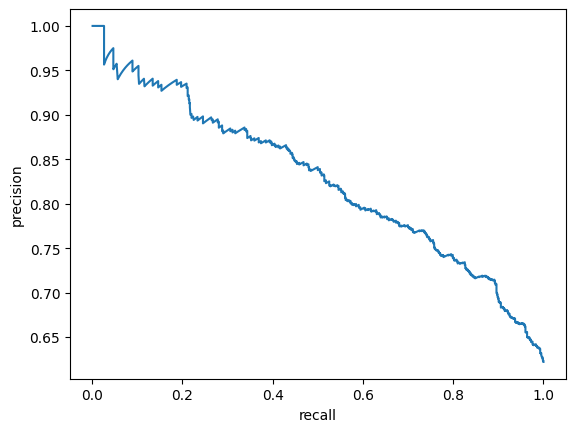

In [43]:
plt.plot(scores['recall'],scores['precision'])
plt.ylabel('precision')
plt.xlabel('recall')

In [63]:
target_recall = 0.9
new_threshold = scores[scores["precision"] >= target_recall]["threshold"].min()
new_threshold

0.866691841044924

### ☑️ Check your code

In [64]:
from nbresult import ChallengeResult

result = ChallengeResult('decision_threshold',
                         threshold = new_threshold
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/03-Performance-metrics/data-threshold-adjustments/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_decision_threshold.py::TestDecision_threshold::test_new_threshold PASSED [100%]

============================== 1 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/decision_threshold.pickle

git commit -m 'Completed decision_threshold step'

git push origin master



# Using the new threshold

🎯 The coach has spotted a potentially interesting player, but wants your 90% guarantee that he would last 5 years minimum as a pro. Download the player's data [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_New_player.csv).

In [61]:
new_player = pd.read_csv("data/ML_New_player.csv")
new_player

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers
0,80,31.4,14.3,5.9,11.1,52.5,0.0,0.1,11.1,2.6,3.9,65.4,3.0,5.0,8.0,2.4,1.1,0.8,2.2


❓ Would you risk recommending the player to the coach? Save your answer as string under variable name `recommendation` as "recommend" or "not recommend".

In [52]:
logistic_regression.fit(X_scaled, y)

LogisticRegression()

In [71]:
def custom_predict(X, custom_threshold):
    probs = logistic_regression.predict_proba(X) # Get likelihood of each sample being classified as 0 or 1
    five_y_probs = probs[:, 1] # Only keep expensive likelihoods (1)
    return (five_y_probs > custom_threshold).astype(int) # Boolean outcome converted to 0 or 1

In [73]:
new_prediction = custom_predict(X=new_player, custom_threshold=new_threshold)[0]
new_prediction

1

In [74]:
recommendation = "recommend"

### ☑️ Check your code

In [75]:
from nbresult import ChallengeResult

result = ChallengeResult('recommendation',
                         recommendation = recommendation
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/03-Performance-metrics/data-threshold-adjustments/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_recommendation.py::TestRecommendation::test_recommendation PASSED   [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/recommendation.pickle

git commit -m 'Completed recommendation step'

git push origin master



# 🏁